# **Mobile Price Classification**

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
train='train.csv'
test='test.csv'
train=pd.read_csv(train,sep=',')
test=pd.read_csv(test,sep=',')

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [7]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## **EDA**

In [8]:
test.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [9]:
num=train.select_dtypes(include='number').columns
num

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [10]:
df_num=train[num]
describeNum = df_num.describe()
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.000000,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.000000,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.000000,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.000000,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


<Axes: >

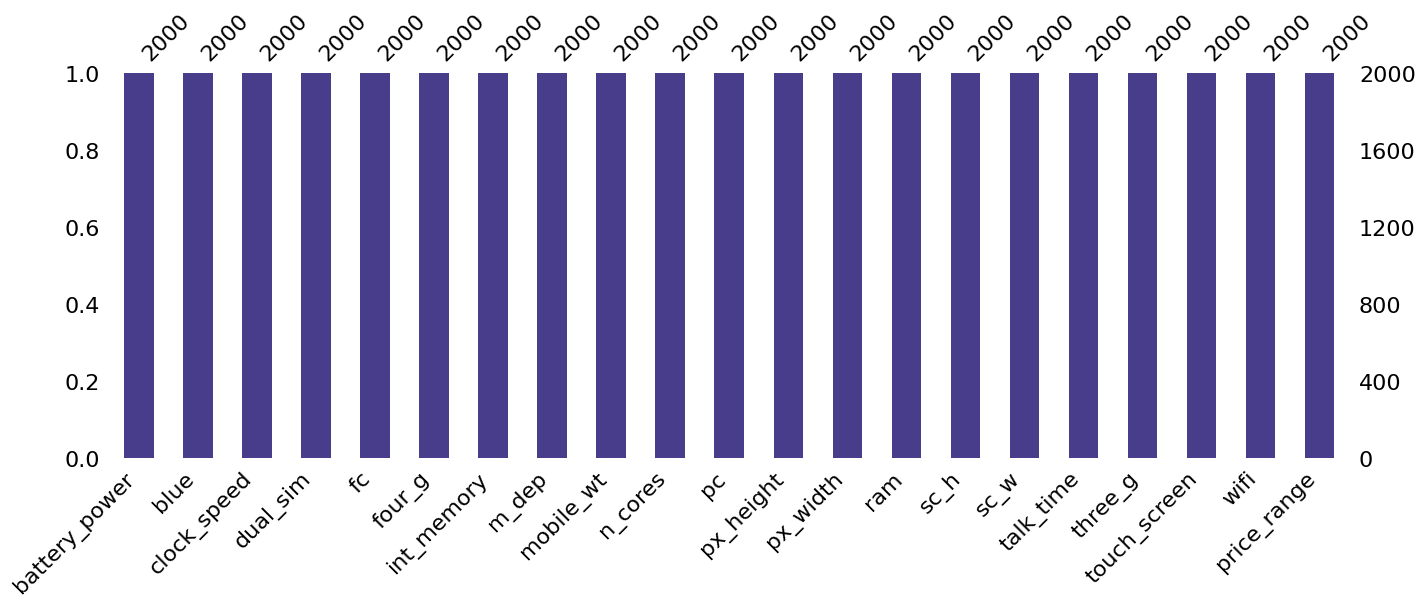

In [11]:
msno.bar(df_num,figsize = (16,5),color = "#483D8B")

In [12]:
for i in df_num.columns:
    unique_values=len(df_num[i].unique())
    print("{i} has {unique_values} unique values".format(i=i,unique_values=unique_values))

battery_power has 1094 unique values
blue has 2 unique values
clock_speed has 26 unique values
dual_sim has 2 unique values
fc has 20 unique values
four_g has 2 unique values
int_memory has 63 unique values
m_dep has 10 unique values
mobile_wt has 121 unique values
n_cores has 8 unique values
pc has 21 unique values
px_height has 1137 unique values
px_width has 1109 unique values
ram has 1562 unique values
sc_h has 15 unique values
sc_w has 19 unique values
talk_time has 19 unique values
three_g has 2 unique values
touch_screen has 2 unique values
wifi has 2 unique values
price_range has 4 unique values


In [13]:
cat_features=list()
num_features=list()
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    if unique_values<30:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)

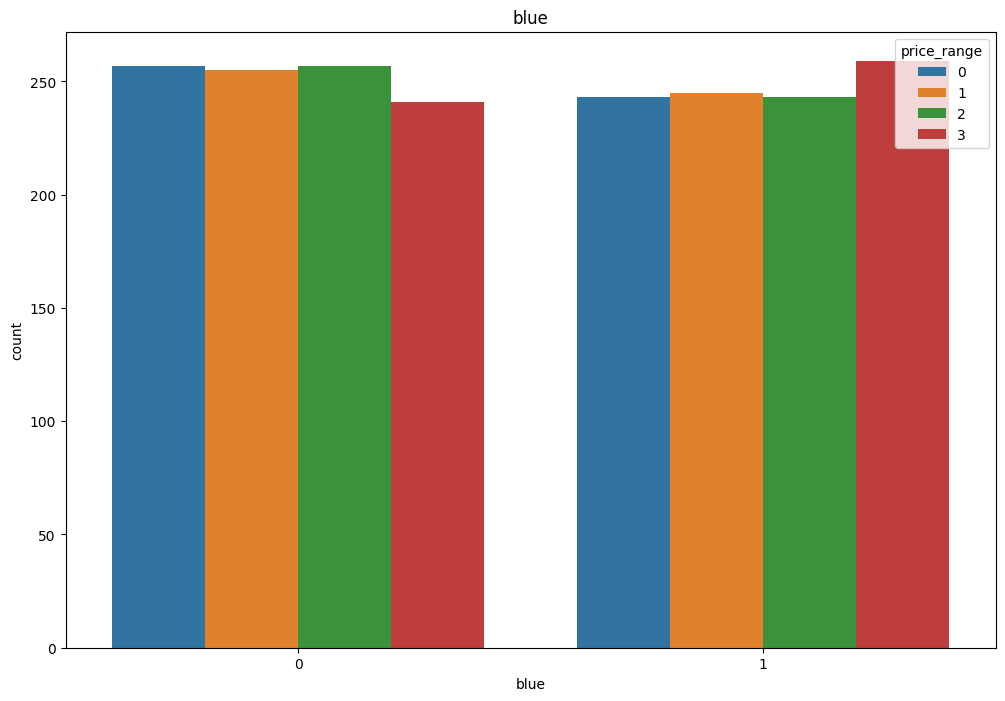

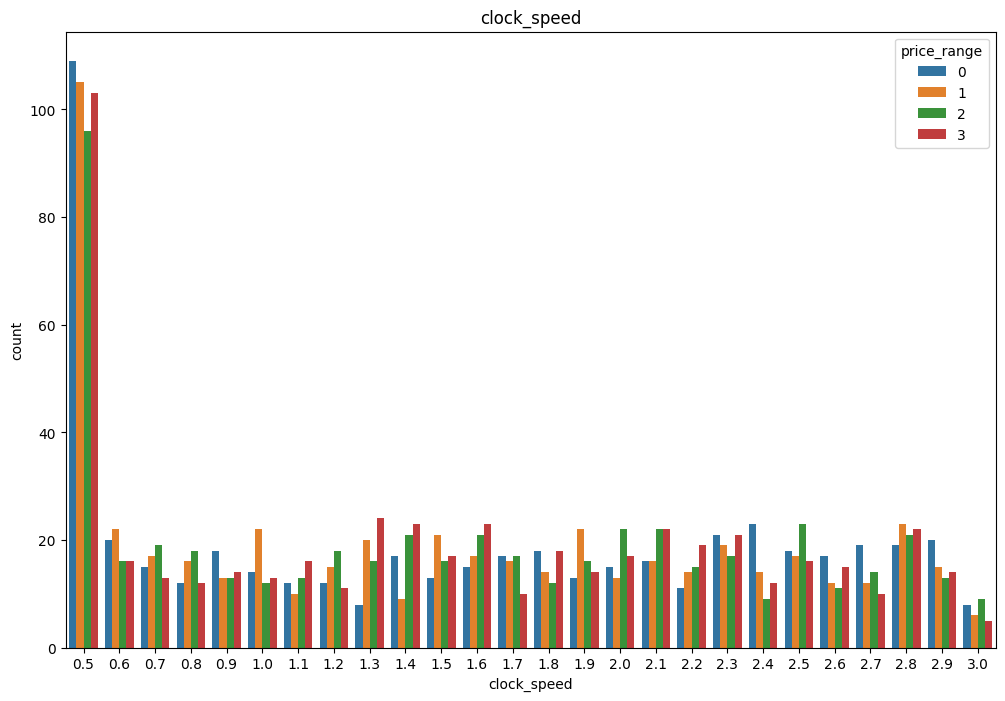

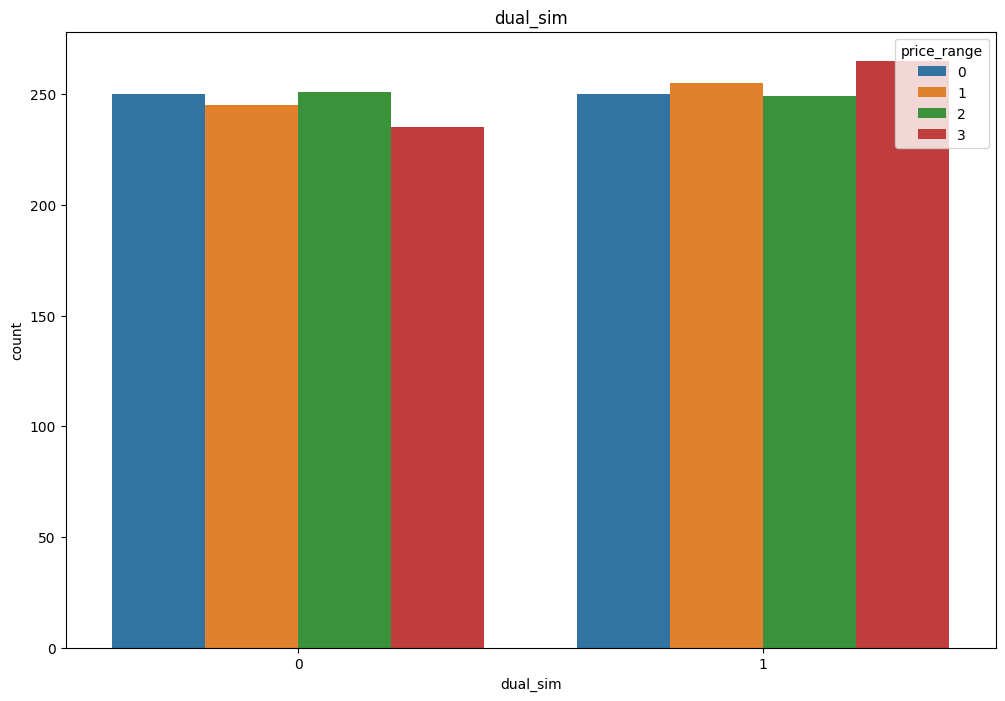

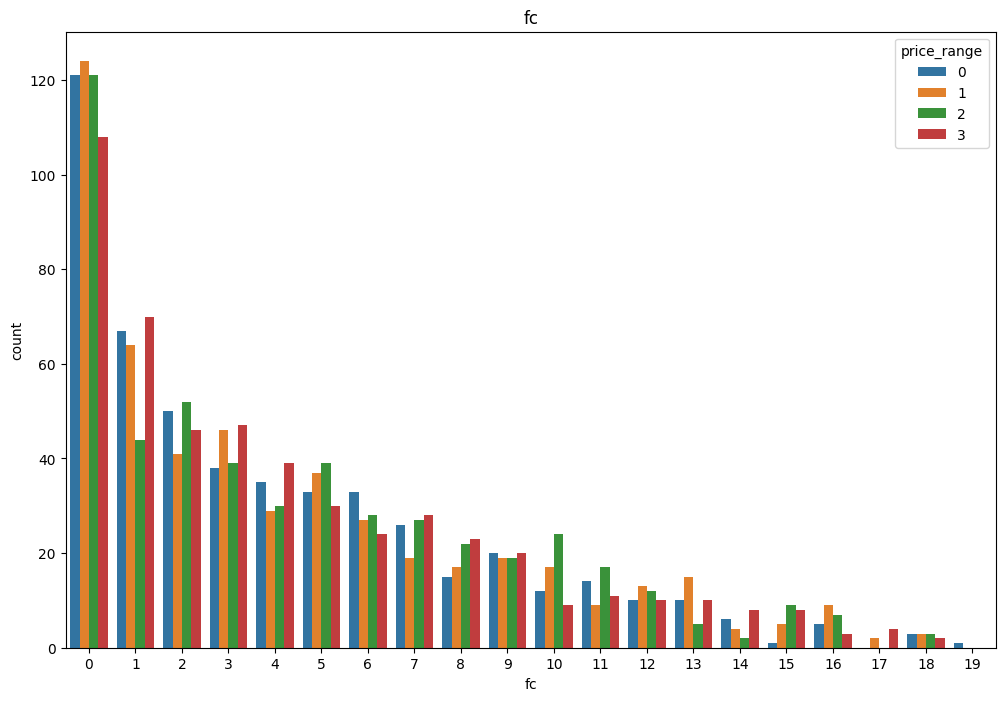

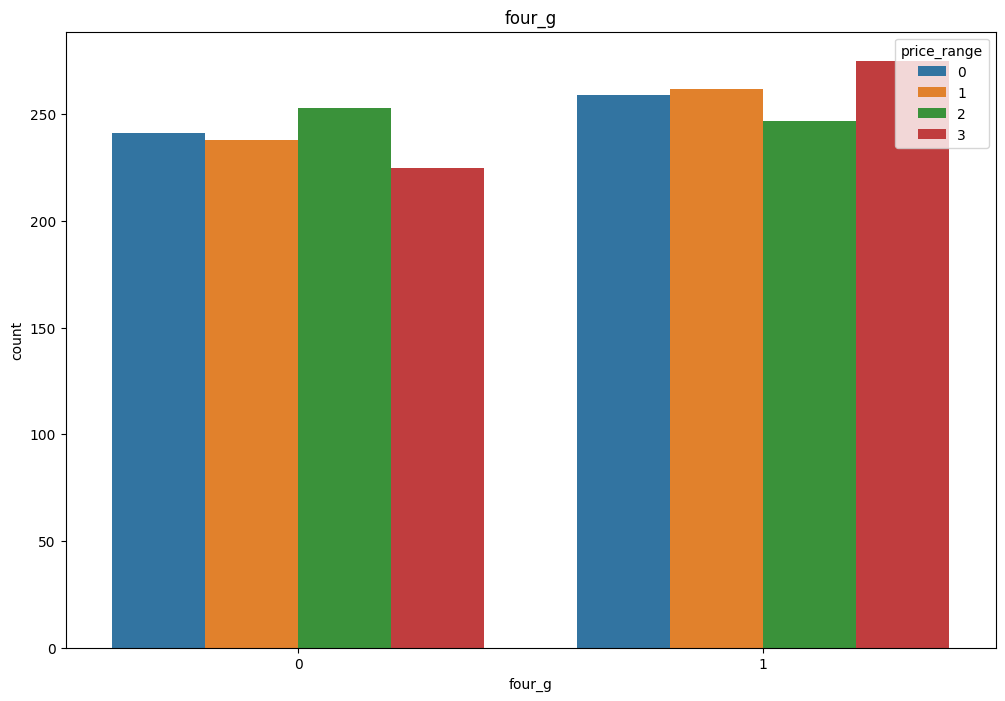

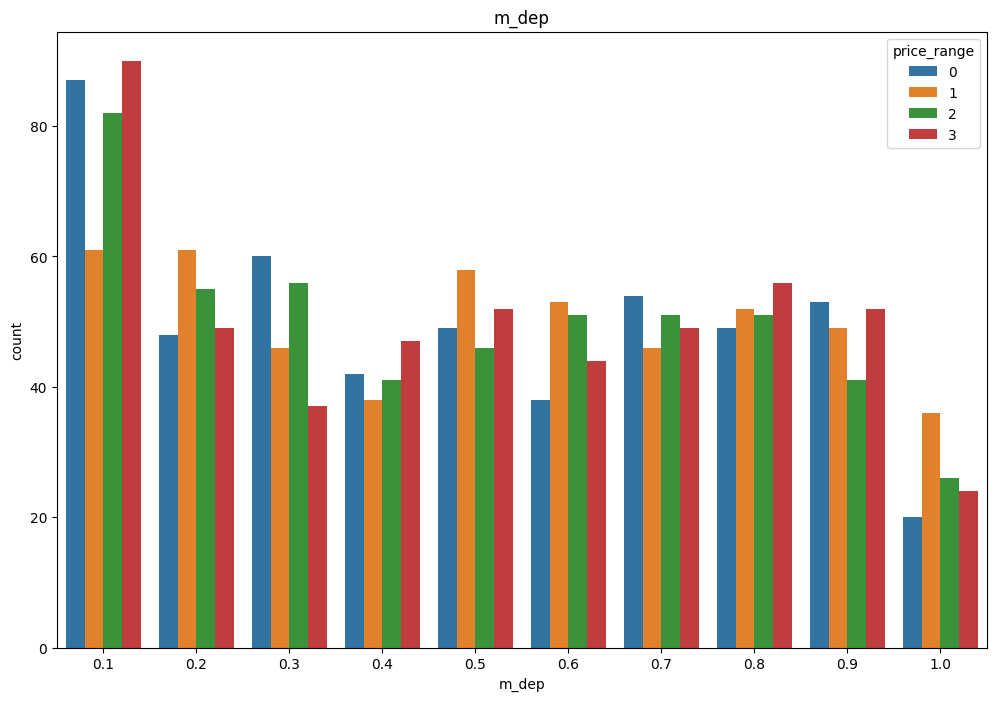

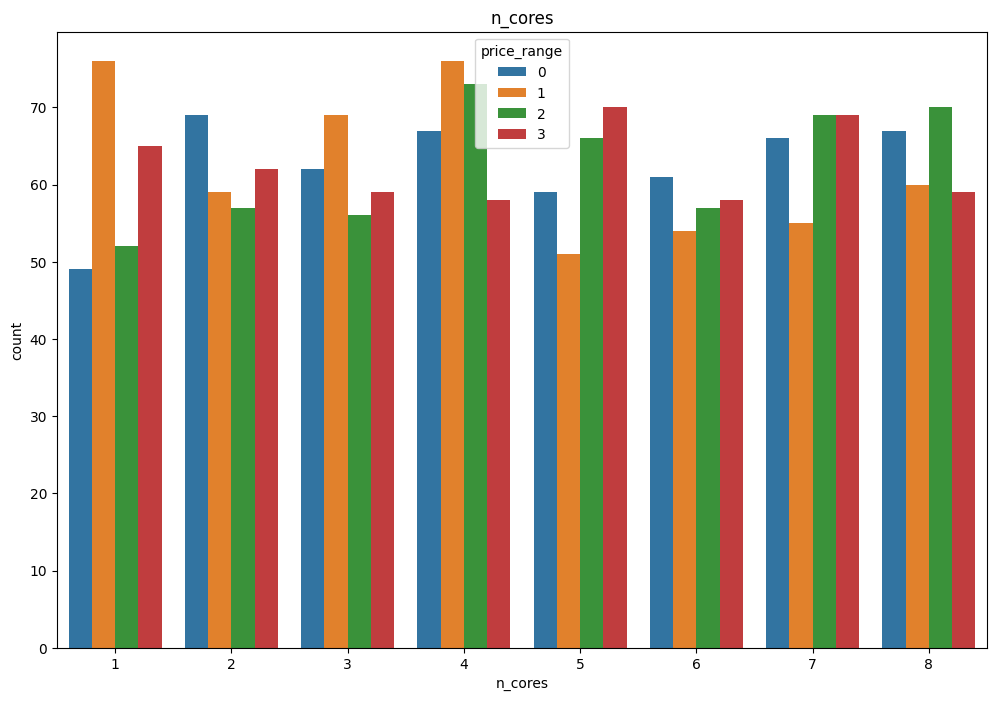

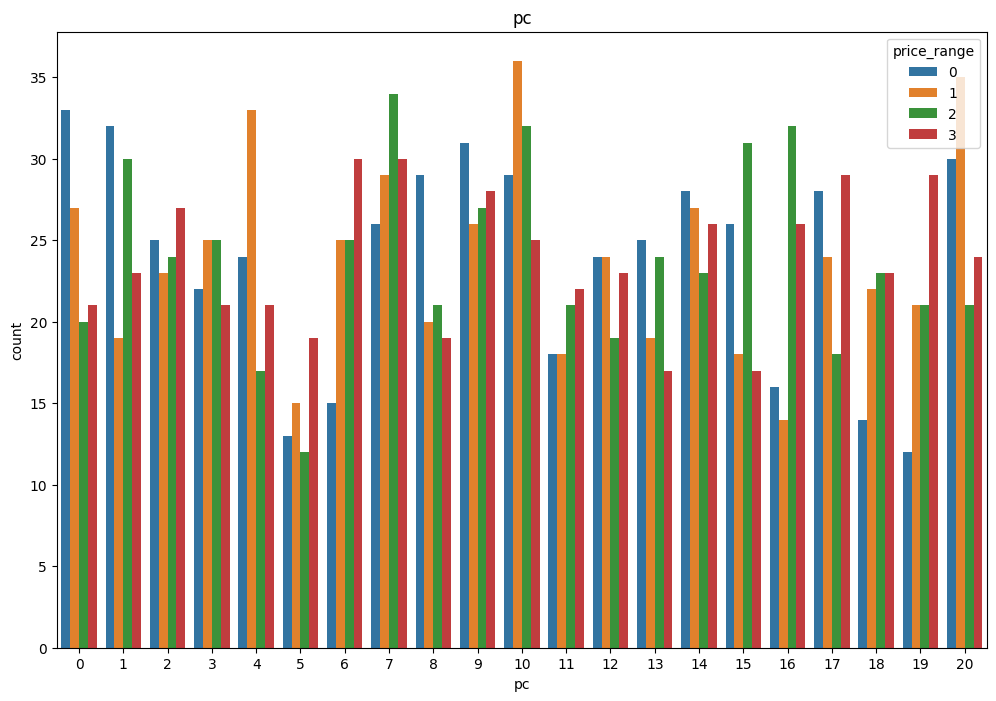

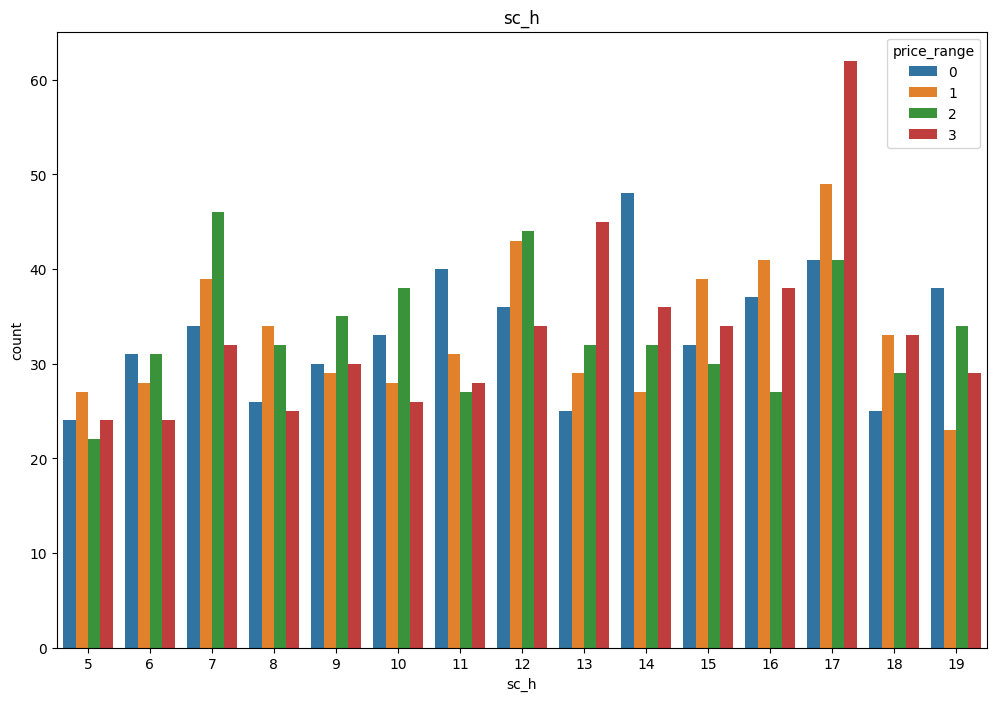

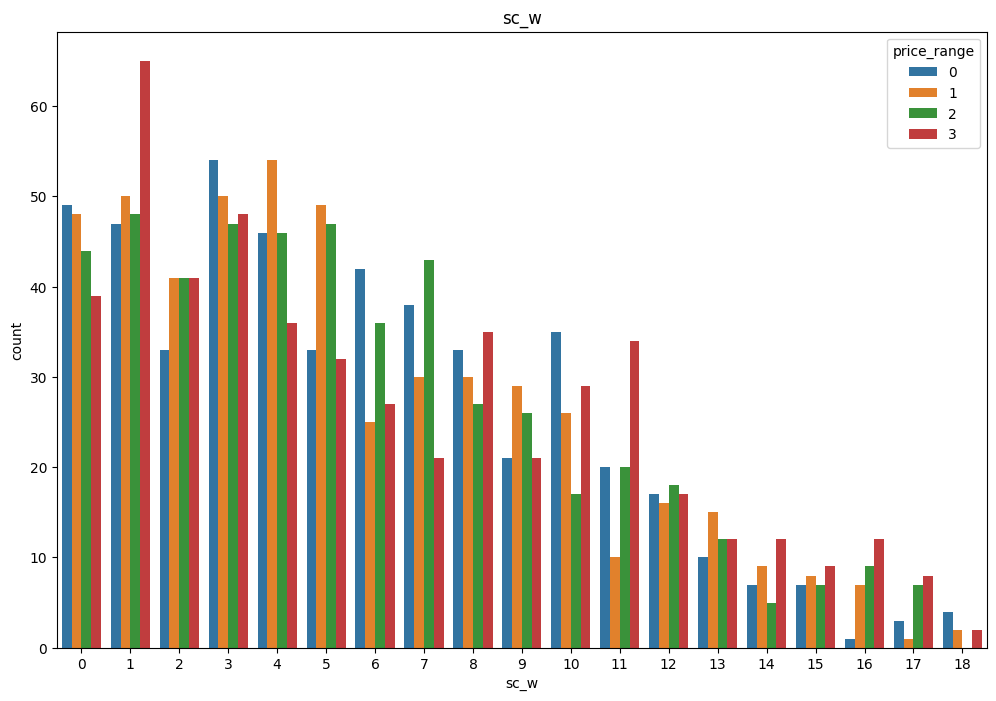

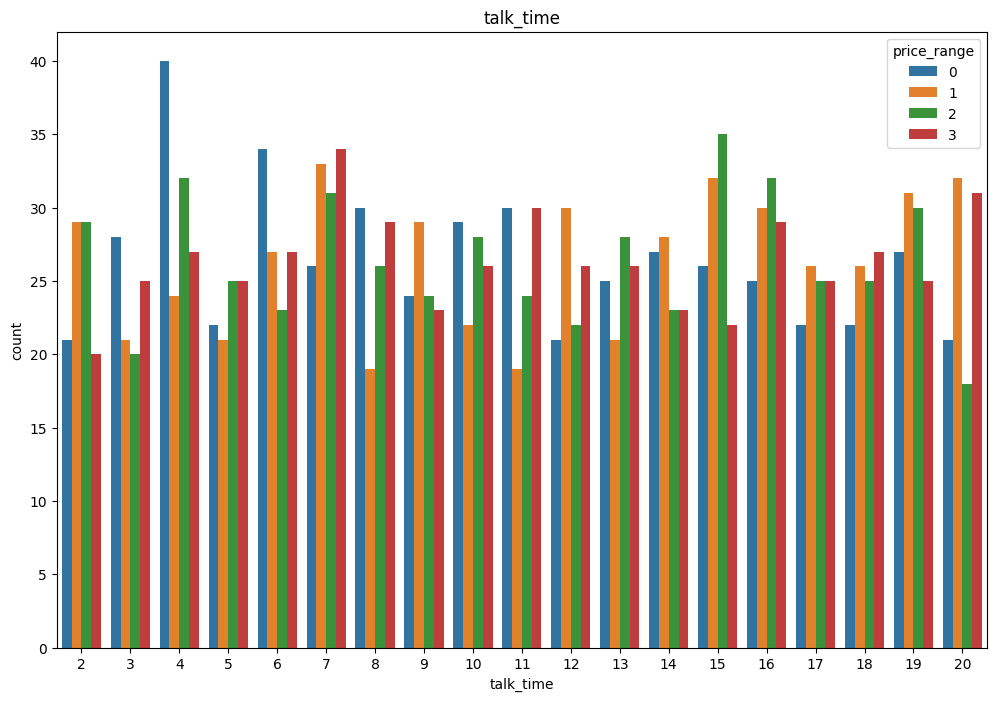

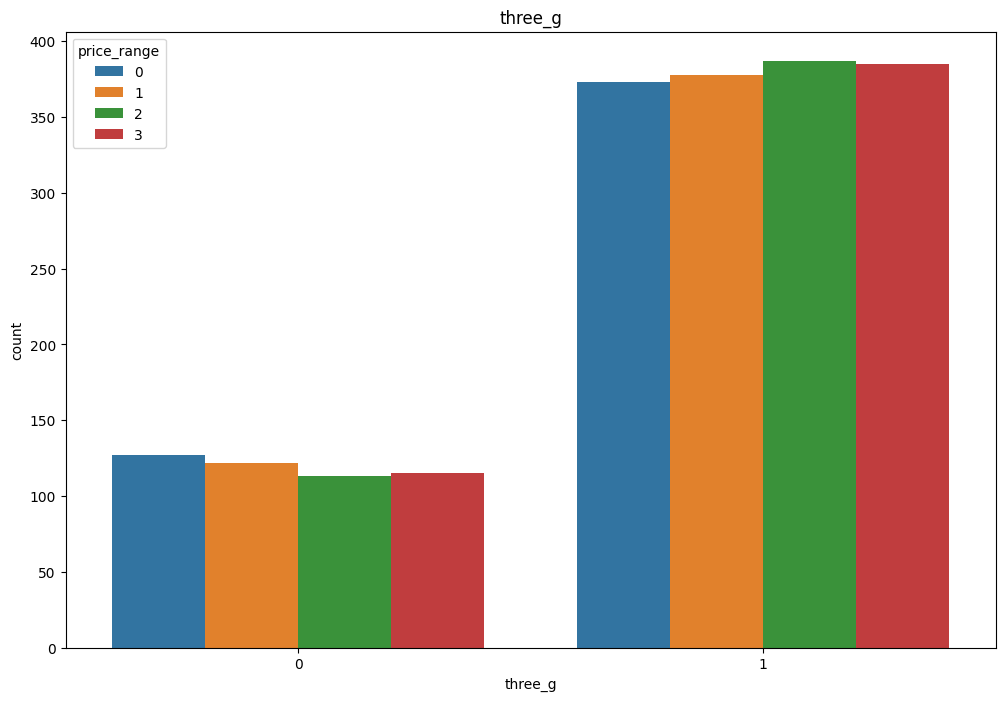

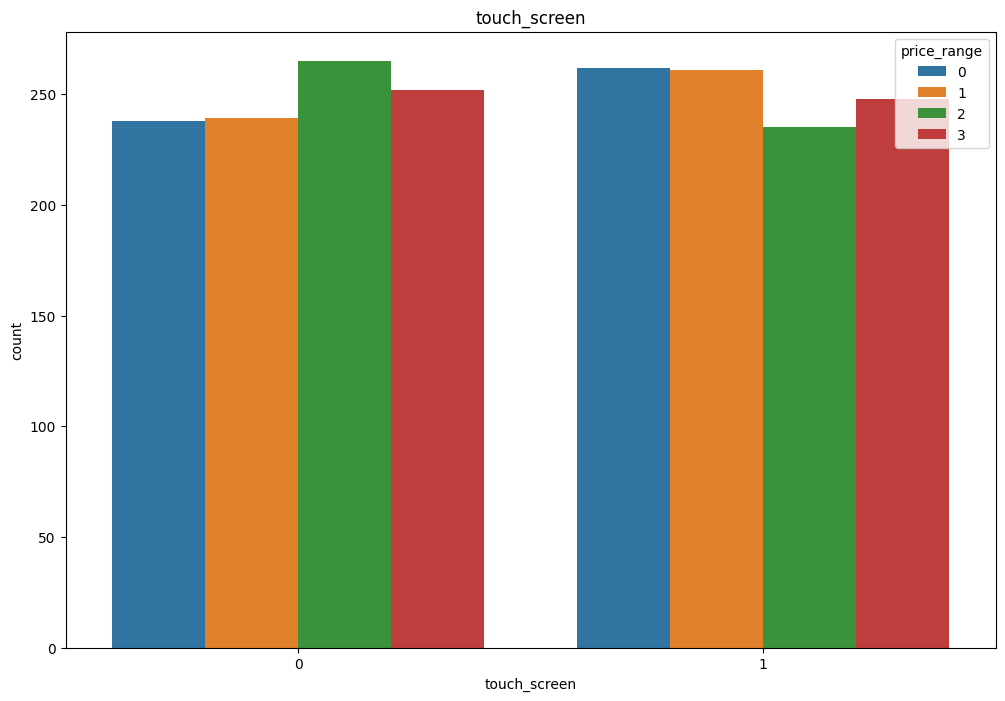

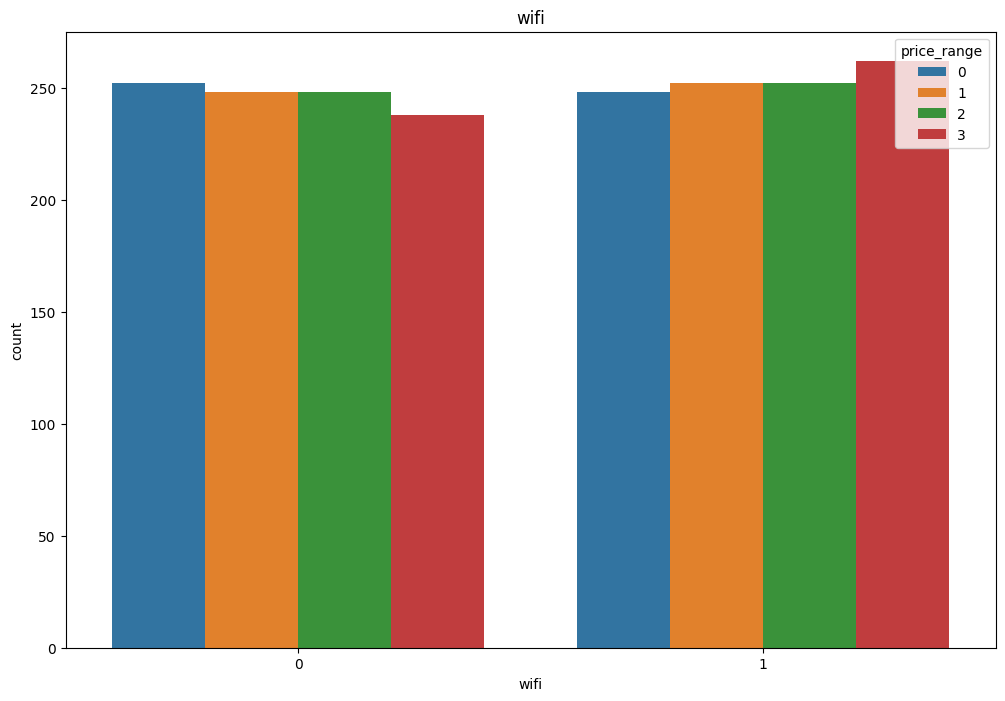

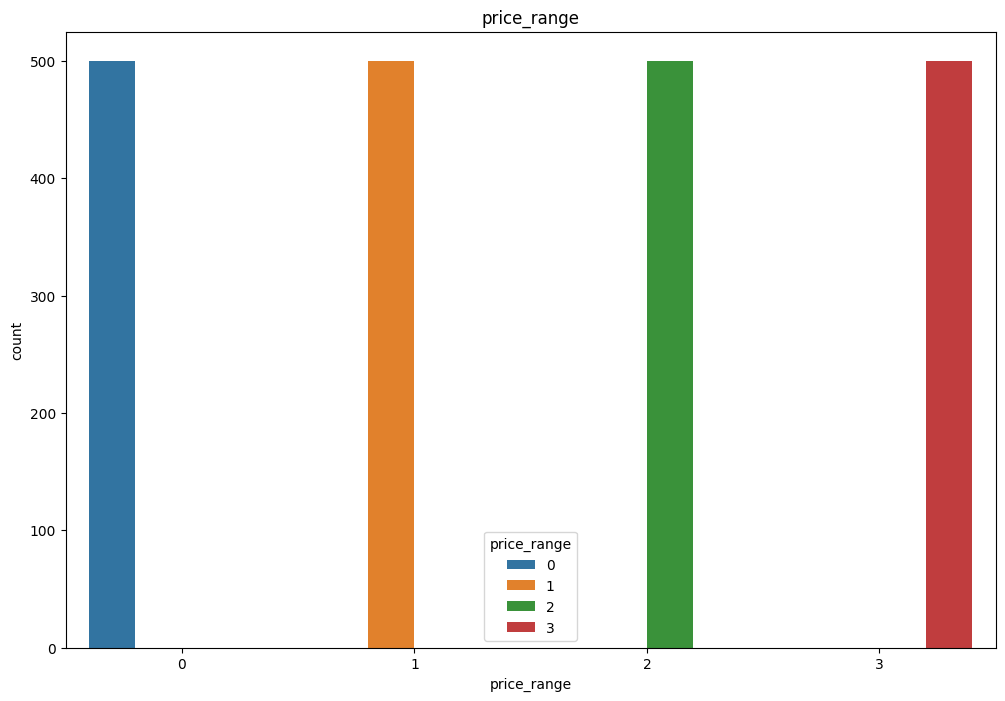

In [14]:
train_cat=train[cat_features]

for i in train_cat.columns:
    plt.figure(figsize=(12,8))
    sns.countplot(x=i,data=train_cat,hue='price_range')
    plt.title(i)
    plt.show()

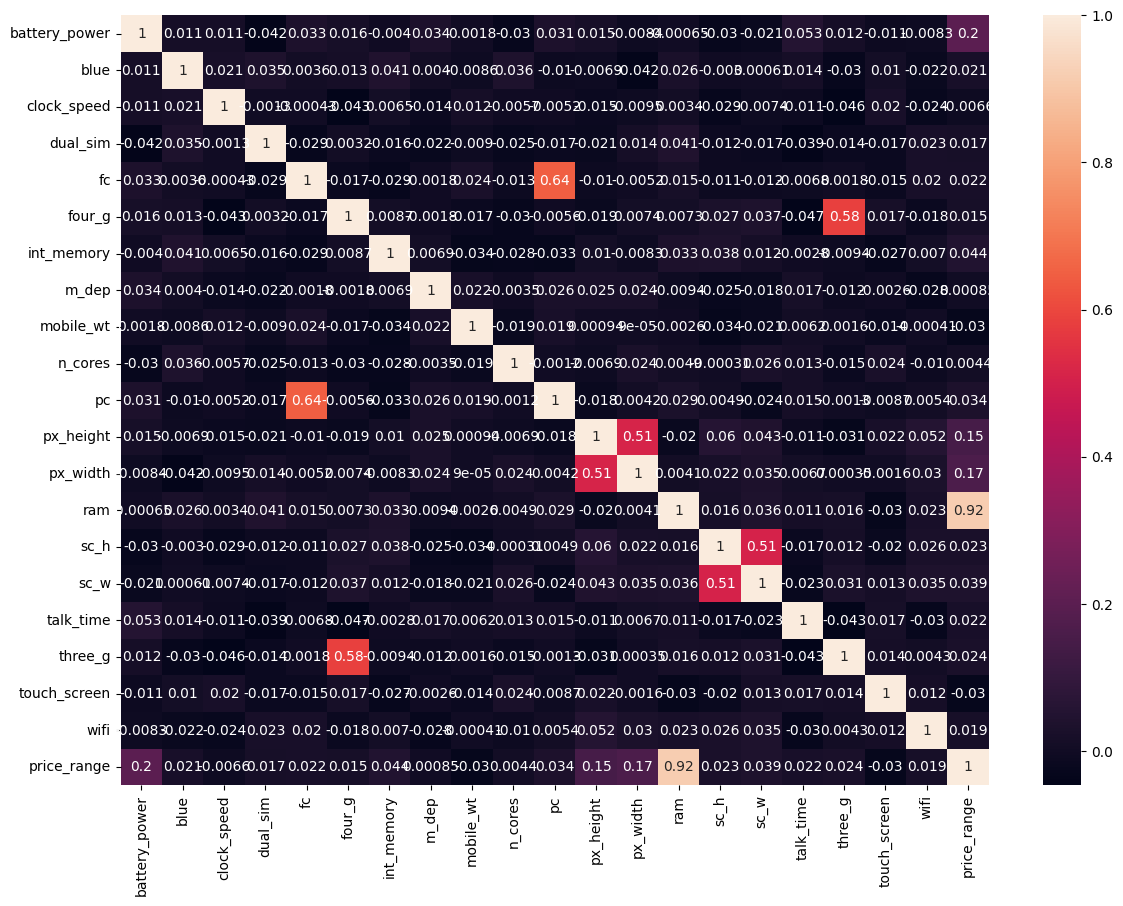

Bad pipe message: %s [b' q=0.9, image/avif, image/webp, image/apng, */*; q=0.8, application/signed-exchange; v=b3; q=0.7\r\nHost: loc', b'host:33007\r\nUser-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, lik']
Bad pipe message: %s [b'Gecko) Chrome/117.0.0.0 Safari/537.36\r\nAccept-Encoding: gzip, deflate, br\r\nAccept-Language: es-US, e']
Bad pipe message: %s [b'419; q=0.9, es; q=0.8, en; q=0.7\r\nCache-Control: max-age=0\r\nReferer: https://urban-memory-9wgjrq497q6cpvjv.github.', b'v/\r\ntraceparent: 00-a9f7425b723c0fee7603e305ca065252-159ea207b888bee9-00\r\nX-Request-ID: 3312a064b2c', b'94ccd82a5ece9ec4664\r\nX-Real-IP: 10.240.0.199\r\nX-Forwarded-Proto: https\r\nX-Forwarded-Host: urban-memo']
Bad pipe message: %s [b'-9wgjrq497q6cpvjv-33007.app.github.dev\r\nX-Forwarded-Port: 443\r\nX-Forwarded-Scheme: https\r\nX-Original-URI: /\r\nX-Sc', b'me: https\r\nProxy-Connection: Keep-Alive\r\nsec-fetch-site: same-site\r\nsec-fetch-mode: navigate\r\nsec-fetch', b'

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [1]:
print('hola mundo')

hola mundo
